In [1]:
import polars as pl
from hydra import initialize, compose
from omegaconf import  OmegaConf
from EDA_functions import * 
initialize(config_path="dataconfig") 
config_hydra = compose(config_name="dataconfig")
config_dict = OmegaConf.to_object(config_hydra)
config = Config(**config_dict) 
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

/tmp/ipykernel_50201/2644172097.py:5: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path="dataconfig")


In [2]:
df = pl.read_csv(source=config.data_path)
df.head(20)

User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
i64,str,str,i64,f64,i64,i64,i64,i64,str,i64
1,"""Google Pixel 5""","""Android""",393,6.4,1872,67,1122,40,"""Male""",4
2,"""OnePlus 9""","""Android""",268,4.7,1331,42,944,47,"""Female""",3
3,"""Xiaomi Mi 11""","""Android""",154,4.0,761,32,322,42,"""Male""",2
4,"""Google Pixel 5""","""Android""",239,4.8,1676,56,871,20,"""Male""",3
5,"""iPhone 12""","""iOS""",187,4.3,1367,58,988,31,"""Female""",3
…,…,…,…,…,…,…,…,…,…,…
16,"""Google Pixel 5""","""Android""",503,10.4,2571,84,2025,39,"""Female""",5
17,"""OnePlus 9""","""Android""",132,3.6,628,32,344,47,"""Female""",2
18,"""iPhone 12""","""iOS""",299,5.8,1431,41,985,44,"""Female""",3


In [3]:
df_numerical = df.select(cs.numeric())

In [4]:
df_numerical

User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
i64,i64,f64,i64,i64,i64,i64,i64
1,393,6.4,1872,67,1122,40,4
2,268,4.7,1331,42,944,47,3
3,154,4.0,761,32,322,42,2
4,239,4.8,1676,56,871,20,3
5,187,4.3,1367,58,988,31,3
…,…,…,…,…,…,…,…
696,92,3.9,1082,26,381,22,2
697,316,6.8,1965,68,1201,59,4
698,99,3.1,942,22,457,50,2


In [5]:
df.describe()

statistic,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
str,f64,str,str,f64,f64,f64,f64,f64,f64,str,f64
"""count""",700.0,"""700""","""700""",700.0,700.0,700.0,700.0,700.0,700.0,"""700""",700.0
"""null_count""",0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0
"""mean""",350.5,null,null,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,null,2.99
"""std""",202.21688,null,null,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,null,1.401476
"""min""",1.0,"""Google Pixel 5""","""Android""",30.0,1.0,302.0,10.0,102.0,18.0,"""Female""",1.0
"""25%""",176.0,null,null,114.0,2.5,723.0,26.0,373.0,28.0,null,2.0
"""50%""",351.0,null,null,228.0,4.9,1505.0,49.0,824.0,38.0,null,3.0
"""75%""",525.0,null,null,433.0,7.4,2229.0,74.0,1341.0,49.0,null,4.0
"""max""",700.0,"""iPhone 12""","""iOS""",598.0,12.0,2993.0,99.0,2497.0,59.0,"""Male""",5.0


In [6]:
df_numerical.describe()

statistic,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",350.5,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.99
"""std""",202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
"""min""",1.0,30.0,1.0,302.0,10.0,102.0,18.0,1.0
"""25%""",176.0,114.0,2.5,723.0,26.0,373.0,28.0,2.0
"""50%""",351.0,228.0,4.9,1505.0,49.0,824.0,38.0,3.0
"""75%""",525.0,433.0,7.4,2229.0,74.0,1341.0,49.0,4.0
"""max""",700.0,598.0,12.0,2993.0,99.0,2497.0,59.0,5.0


In [7]:
x, labels = df_transformation_to_np(df, config)

In [8]:
c = correlation_matrix_calculation(df_np=x)

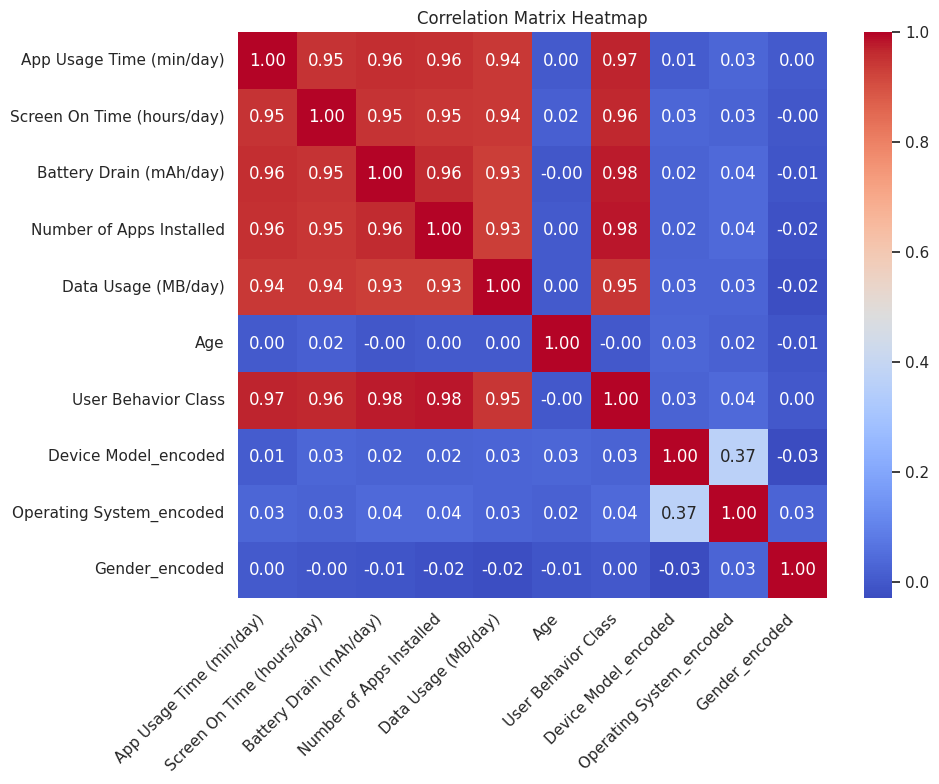

In [9]:
plot_correlation_matrix(c, labels=labels)

In [11]:
print(c)

[[ 1.00000000e+00  9.50333036e-01  9.56384953e-01  9.55252834e-01
   9.42307528e-01  4.38223523e-03  9.70497679e-01  7.96477949e-03
   3.15773892e-02  4.55059973e-03]
 [ 9.50333036e-01  1.00000000e+00  9.48983136e-01  9.46975149e-01
   9.41322018e-01  1.72322279e-02  9.64580883e-01  3.15876729e-02
   2.64695653e-02 -3.57336680e-03]
 [ 9.56384953e-01  9.48983136e-01  1.00000000e+00  9.61853262e-01
   9.32275764e-01 -2.72241187e-03  9.78587121e-01  2.25646474e-02
   4.03607193e-02 -6.27142253e-03]
 [ 9.55252834e-01  9.46975149e-01  9.61853262e-01  1.00000000e+00
   9.34799975e-01  4.03404171e-03  9.81255143e-01  2.43987454e-02
   3.89842253e-02 -1.62448910e-02]
 [ 9.42307528e-01  9.41322018e-01  9.32275764e-01  9.34799975e-01
   1.00000000e+00  3.99894927e-03  9.46733835e-01  2.76147510e-02
   2.86874249e-02 -2.31508842e-02]
 [ 4.38223523e-03  1.72322279e-02 -2.72241187e-03  4.03404171e-03
   3.99894927e-03  1.00000000e+00 -5.62531396e-04  3.28482393e-02
   2.03579171e-02 -6.96496650e-03

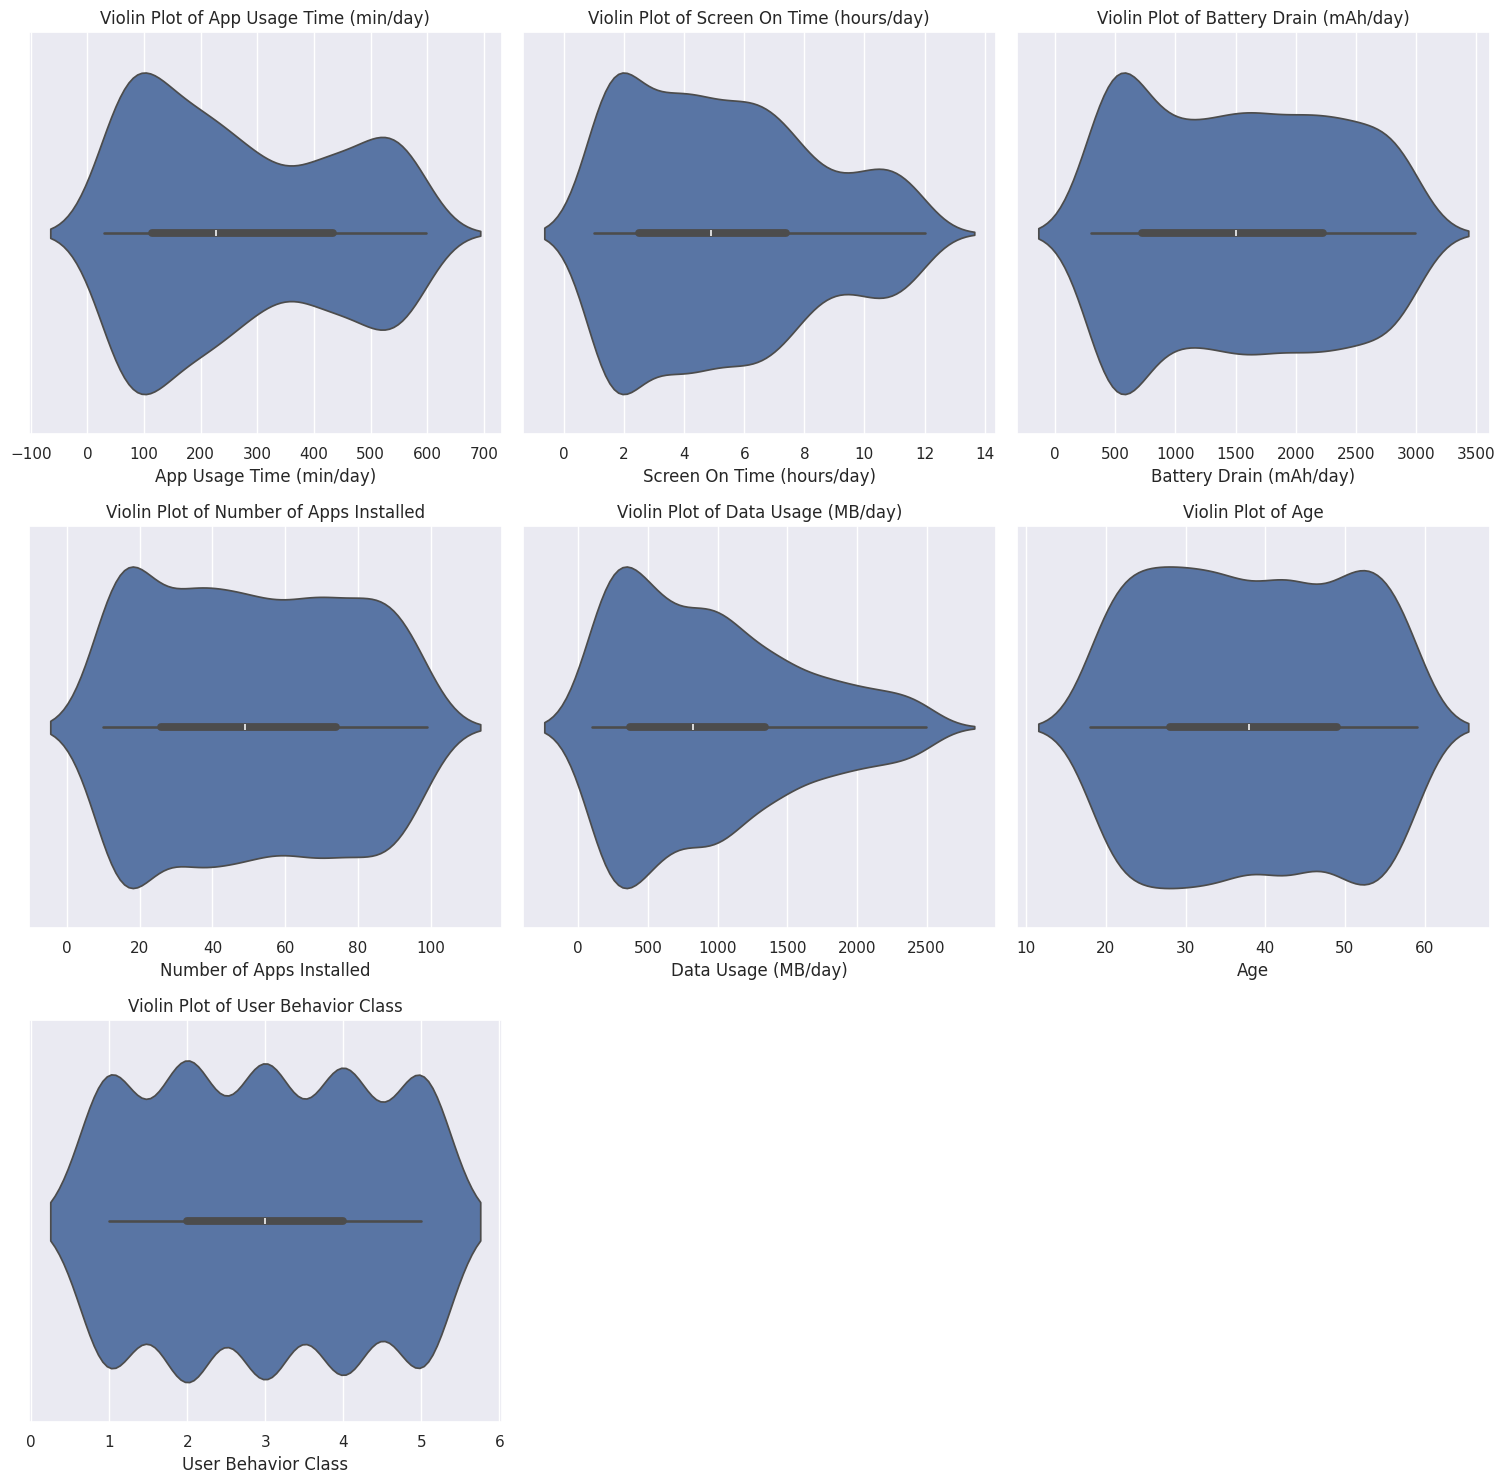

In [10]:
plot_violin_grid(df, config)

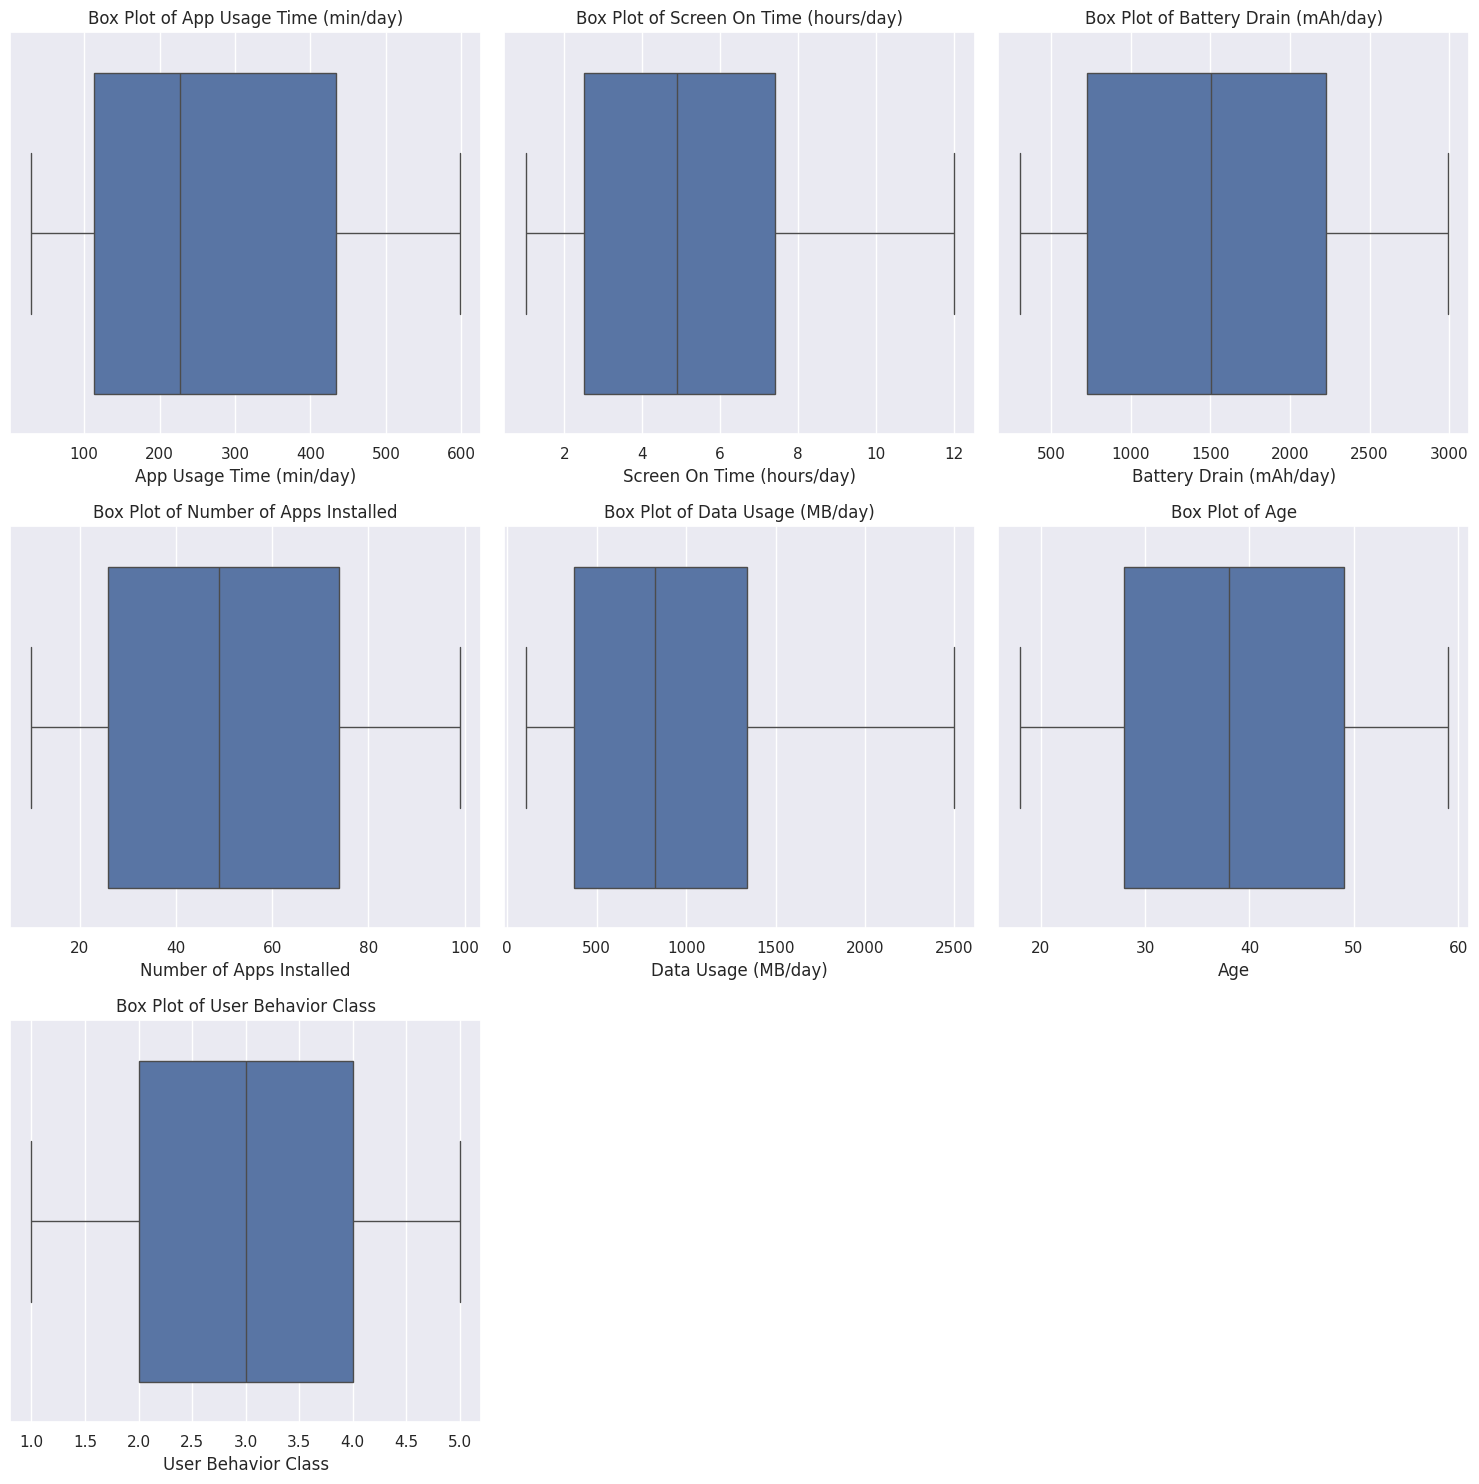

In [11]:
plot_box_grid(df, config)

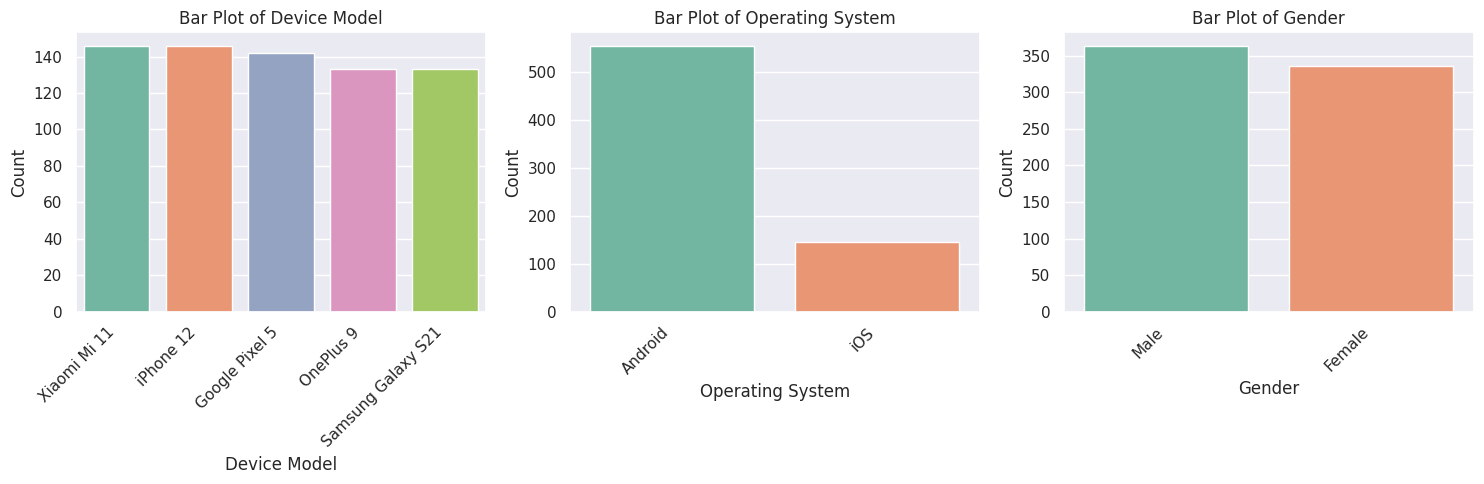

In [12]:
plot_barplot_grid(df)

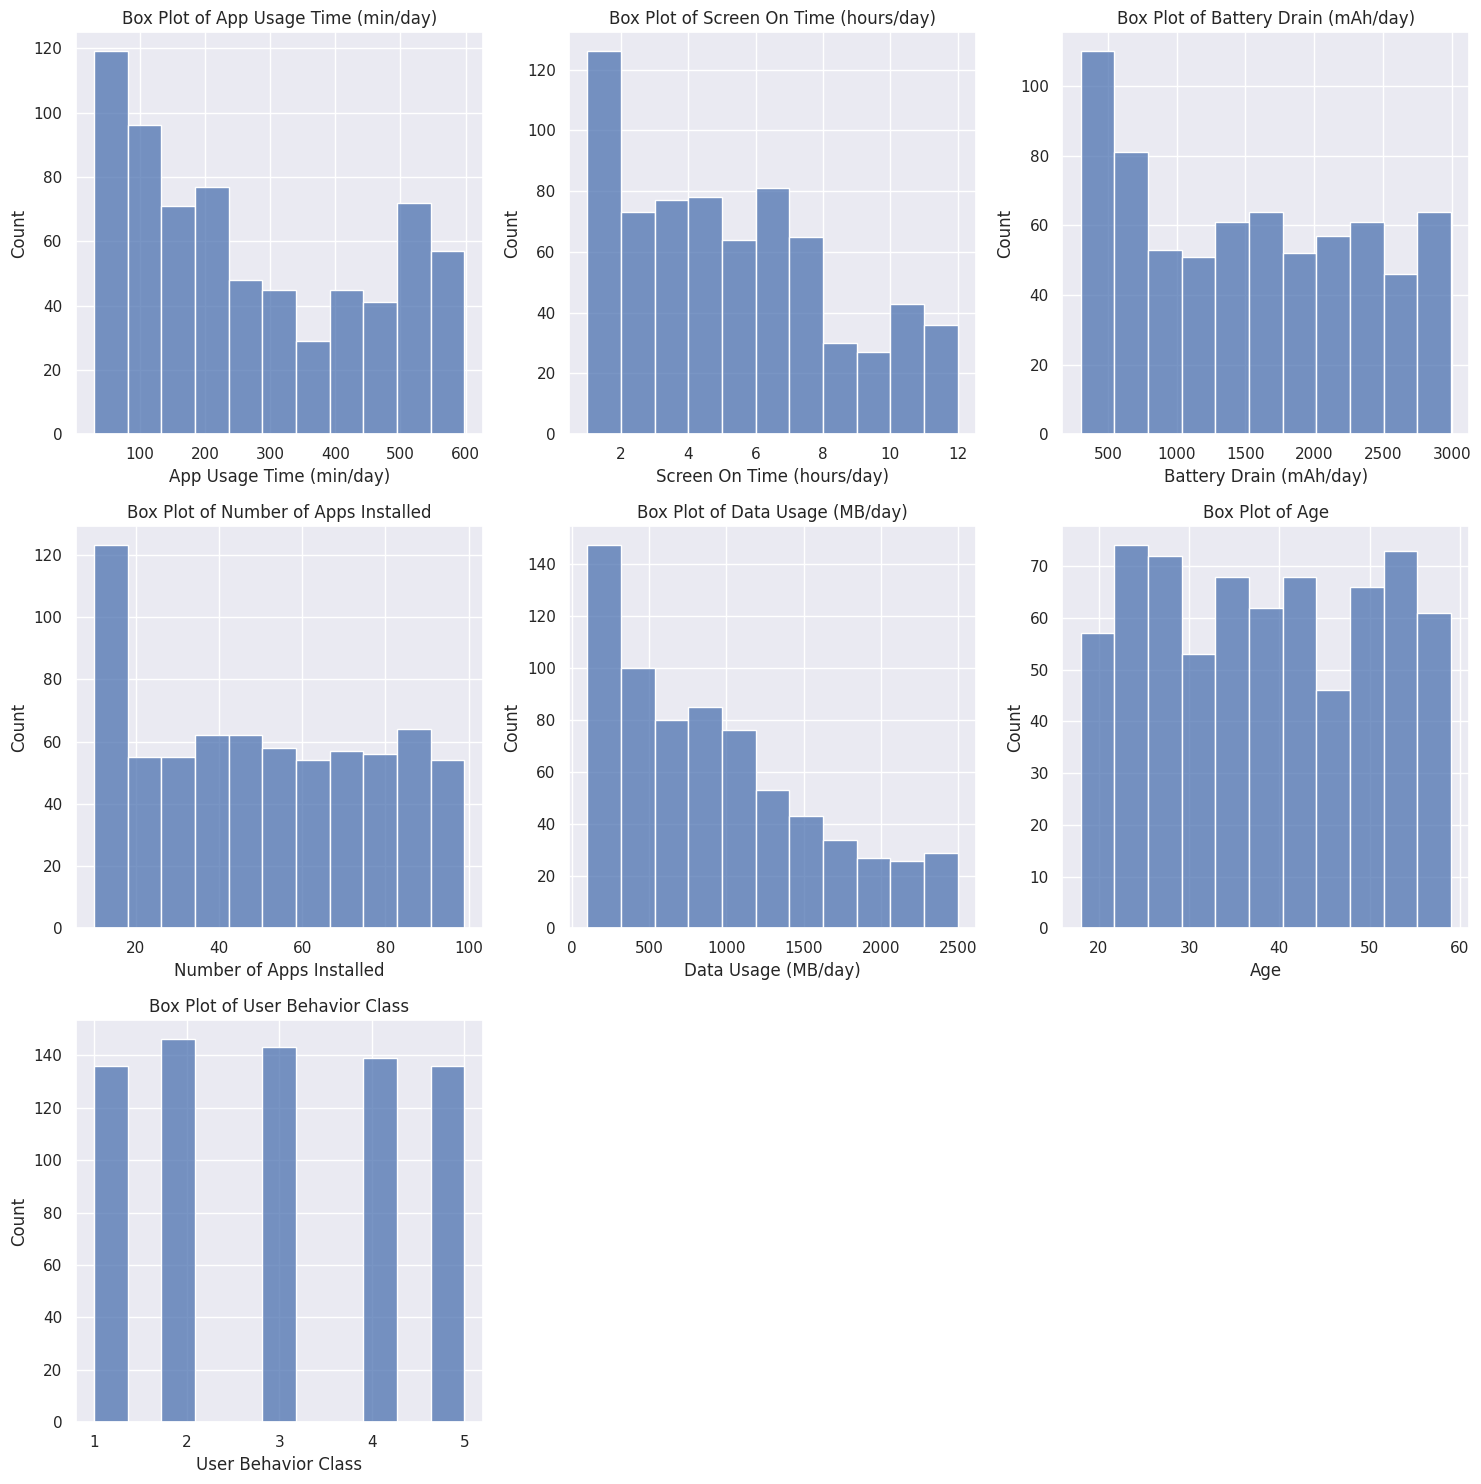

In [13]:
plot_histplot_grid(df, config)